<i><h1 style="text-align:center;color:#FFFFF">Customer Telcom</h1></i>

## Preparación de Ambiente de Trabajo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_score, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

## Exploratory Data Analysis

In [3]:
df = pd.read_excel("Cellphone.xlsx", sheet_name="Data")

In [4]:
df.columns

Index(['Cancelará?', 'AccountWeeks', 'ContractRenewal', 'DataPlan',
       'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge',
       'AverageFee', 'RoamMins', 'Partition'],
      dtype='object')

In [5]:
df.rename(columns={"Cancelará?": "target"}, inplace=True)

In [6]:
df.columns

Index(['target', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'AverageFee',
       'RoamMins', 'Partition'],
      dtype='object')

In [7]:
df.shape

(2151, 12)

In [8]:
df.head()

,target,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,AverageFee,RoamMins,Partition
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3,t
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3,t
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6,t
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9,t
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2,t


In [9]:
df.tail()

,target,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,AverageFee,RoamMins,Partition
2146,0,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0,v
2147,1,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8,v
2148,0,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9,v
2149,0,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5,v
2150,0,81,1,0,0.00,1,154.5,84,45.0,10.81,13.7,v


In [10]:
df.sample(10)

,target,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,AverageFee,RoamMins,Partition
1391,0,124,1,0,0.00,0,253.5,104,54.0,5.90,14.0,v
1186,0,80,1,0,0.24,1,197.5,114,54.4,10.35,11.3,v
985,0,68,1,0,0.00,2,207.6,68,57.0,12.58,10.9,v
291,1,84,1,0,0.00,2,289.1,100,70.0,11.69,12.7,t
107,1,86,1,0,0.30,7,128.3,121,42.0,9.86,12.2,t
573,0,99,1,0,0.00,0,155.3,93,49.0,13.29,12.4,v
1568,0,58,1,1,2.57,1,194.5,110,77.7,10.69,9.5,v
150,1,54,1,0,0.00,1,286.6,73,68.0,11.16,11.5,t
1028,0,190,1,0,0.26,0,142.9,96,42.6,8.90,6.6,v
1209,0,122,1,0,0.29,2,107.9,88,41.9,11.79,9.5,v


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,2151.0,0.224547,0.417380,0.00,0.00,0.00,0.00,1.00
AccountWeeks,2151.0,100.765690,40.167417,1.00,73.00,100.00,127.00,243.00
ContractRenewal,2151.0,0.884705,0.319452,0.00,1.00,1.00,1.00,1.00
DataPlan,2151.0,0.272896,0.445552,0.00,0.00,0.00,1.00,1.00
DataUsage,2151.0,0.802171,1.267394,0.00,0.00,0.00,1.70,5.40
CustServCalls,2151.0,1.647606,1.398485,0.00,1.00,1.00,2.00,9.00
DayMins,2151.0,183.437564,56.741567,0.00,145.40,182.30,221.95,350.80
DayCalls,2151.0,100.361692,20.213726,0.00,87.00,101.00,114.00,165.00
MonthlyCharge,2151.0,56.891539,16.467762,14.00,45.00,54.10,67.00,111.30
AverageFee,2151.0,10.112450,2.530385,2.11,8.39,10.14,11.82,18.19


In [12]:
df.isna().sum()

target             0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
AverageFee         0
RoamMins           0
Partition          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           2151 non-null   int64  
 1   AccountWeeks     2151 non-null   int64  
 2   ContractRenewal  2151 non-null   int64  
 3   DataPlan         2151 non-null   int64  
 4   DataUsage        2151 non-null   float64
 5   CustServCalls    2151 non-null   int64  
 6   DayMins          2151 non-null   float64
 7   DayCalls         2151 non-null   int64  
 8   MonthlyCharge    2151 non-null   float64
 9   AverageFee       2151 non-null   float64
 10  RoamMins         2151 non-null   float64
 11  Partition        2151 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 201.8+ KB


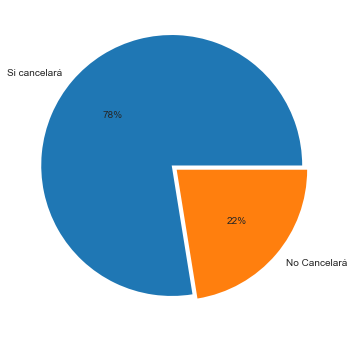

In [14]:
lbls = ["Si cancelará", "No Cancelará"]
szs = df["target"].value_counts(sort=True)
explode = (0.05,0) 
plt.pie(szs, explode=explode, labels=lbls, autopct="%1.f%%")
plt.show()

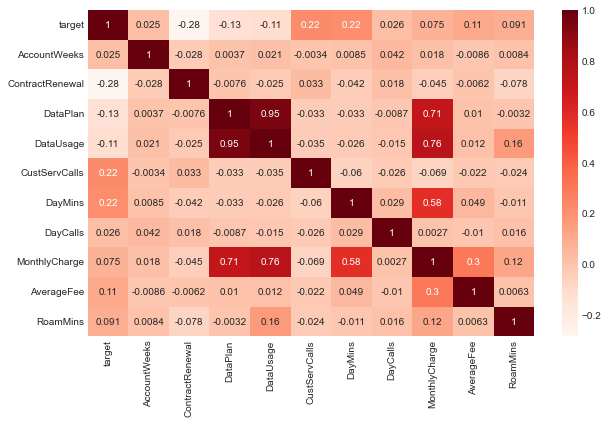

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="Reds")
plt.show()

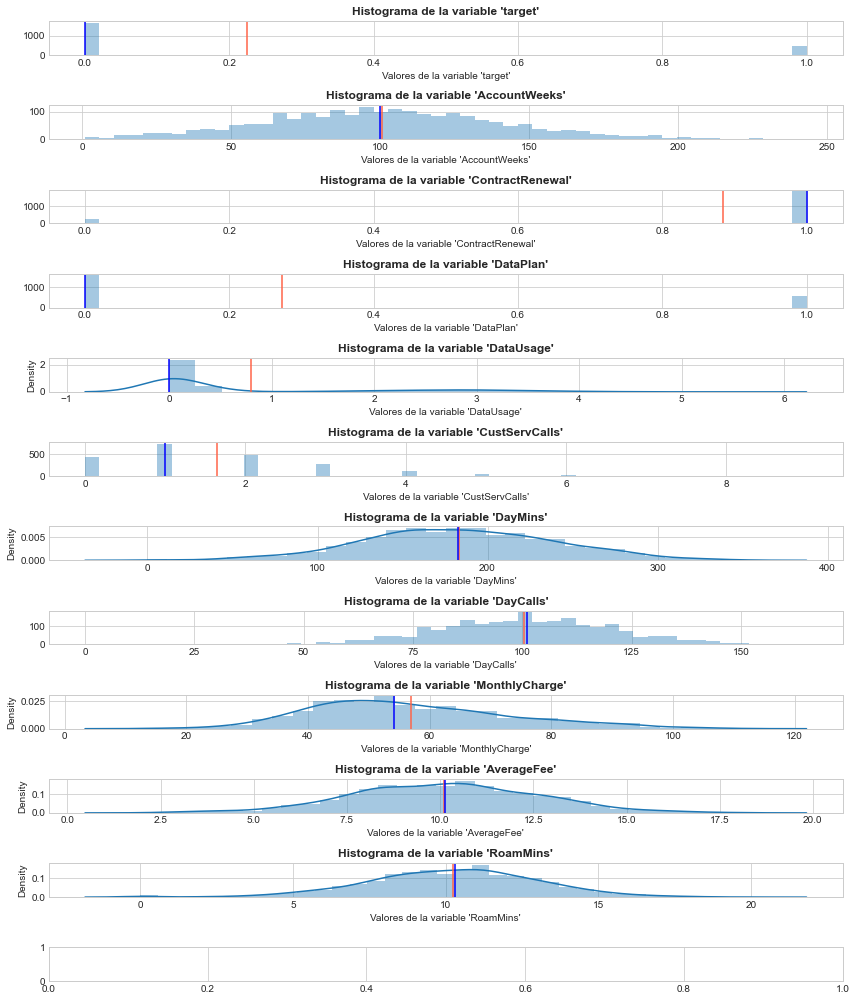

In [16]:
# Se realizan gráficos de las variables numericas
plt.figure(figsize=(12,15))
for index, col in enumerate(df.columns):
    plt.subplot((len(list(df.columns)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if df[col].dtypes == "float64":
        sns.distplot(df[col])
        plt.axvline(df[col].mean(), color='tomato')
        plt.axvline(df[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif df[col].dtypes == "int64":
        sns.distplot(df[col], kde = False, bins = 50)
        plt.axvline(df[col].mean(), color='tomato')
        plt.axvline(df[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

## Preprocesamiento

### Partition -> Object

In [17]:
def createDummies(df, col):
    """
    La función createDummies tiene por objetivo realizar el proceso de binary encoding
    respecto a una variable específica
    Parámetros : 
        'df' : dataframe que se esta referenciando
        'col' : columna del dataframe en la cual realizaremos el proceso de binary encoding
    """
    dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = df.drop(col, axis = 1) 
    df = pd.concat([df, dummy], axis=1)
    return df

In [18]:
df = createDummies(df, 'Partition')

## Modelamiento

### Split data 'n Scale

In [19]:
# Variable objetivo
y_vect = df["target"]
# Matriz atributos
X_mat = df.drop(columns=["target"], axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vect, test_size = .3, random_state = 1234)

In [21]:
# Estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)
# Estandarizamos la matriz de testeo
X_test_std = StandardScaler().fit_transform(X_test)

### KNN

### Optimal K

Error mínimo:- 0.17492260061919504 con K = 10


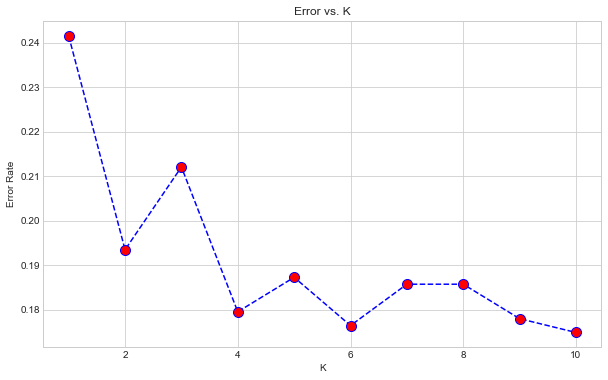

In [22]:
error = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Error mínimo:-",min(error),"con K =",error.index(min(error))+1)

Mayor accuracy:- 0.8250773993808049 con K = 10


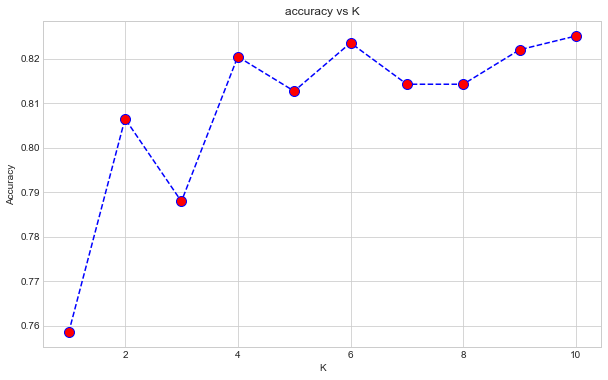

In [23]:
acc = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Mayor accuracy:-",max(acc),"con K =",acc.index(max(acc))+1)


### <div class = "pull-left" style="color:blue;text-align:justify"> Con el error y accuracy estimados, seleccionamos un k = 10 como "óptimo" entre k = 1...10

### Model

In [24]:
model = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

In [25]:
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict)

---

#### Accuracy

In [26]:
print("Accuracy : ",accuracy)

Accuracy :  0.8250773993808049


### <div class = "pull-left" style="color:blue;text-align:justify">La predicción (accuracy) del modelo es 82,5 %, por lo tanto el modelo tiene un desempeño de un ~32% superior que una predicción azarosa

---

#### ConfussionMatrix

In [27]:
confusionMatrix_modelo = confusion_matrix(y_test, predict)

In [28]:
confusionMatrix_modelo_ct = pd.crosstab(y_test, predict)
confusionMatrix_modelo_ct

col_0,0,1
target,,
0,492,14
1,99,41


---

#### Classification Report

In [29]:
model_classification_report = classification_report(y_test, predict)
print(model_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       506
           1       0.75      0.29      0.42       140

    accuracy                           0.83       646
   macro avg       0.79      0.63      0.66       646
weighted avg       0.81      0.83      0.79       646



* Precision : Cuantos de la clase (0 y 1) están correctamente clasificados (proporción).
    * No Cancelará (0) -> 0.83
    * Cancelará (1) -> 0.75   
      
      
* Recall : Proporción de positivos reales que se identificaron de manera correcta en el modelo.
    * No Cancelará (0) -> 0.97
    * Cancelará (1) -> 0.29  

### <div class = "pull-left" style="color:blue;text-align:justify">Mediante el reporte, se observa que el modelo presenta más dificultades para clasificar correctamente los casos donde $y_{i}=1$, es decir, los casos en que el cliente cancelará

### <div class = "pull-left" style="color:blue;text-align:justify"> Se recomienda balancear las clases

---

#### Roc Curve

In [30]:
yhat = model.predict_proba(X_test)[:, 1]  #Reestimamos para obtener la probabilidad entre 0 y 1
# Generamos los objetos de roc_curve
falso_positivo, verdadero_positivo, threshold = roc_curve(y_test, yhat)

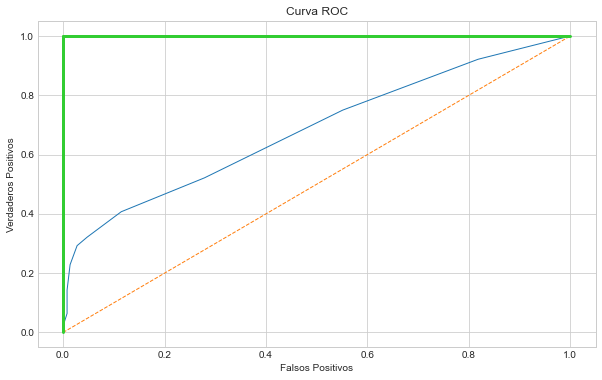

In [31]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(falso_positivo, verdadero_positivo, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), 
plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

### <div class = "pull-left" style="color:blue;text-align:justify">Mediante la gráfica, se puede observar que el modelo tiene una capacidad predictiva adecuada, debido a que la curva ROC, coloreada en azul, se posiciona sobre la bisectriz, dado que la tasa de verdaderos positivos es mayor que la tasa de falsos positivos

In [32]:
roc_auc_score(y_test, yhat)

0.6827710333145115